In [1]:
#import libraries
import pandas as pd
import numpy as np

In [2]:
#import data
df=pd.read_csv("hosing_dataset_to_toture.csv")

In [3]:
df2= df.copy()

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [5]:
df2.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [6]:
import matplotlib.pyplot as plt

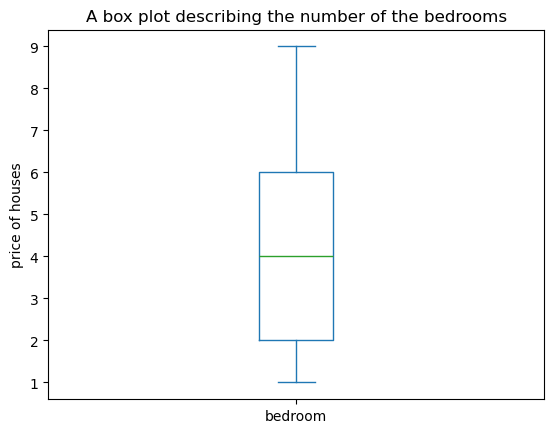

In [7]:
df2["bedroom"].plot(kind="box")
plt.title("A box plot describing the number of the bedrooms")
plt.ylabel("price of houses")
plt.show()

<Axes: ylabel='Frequency'>

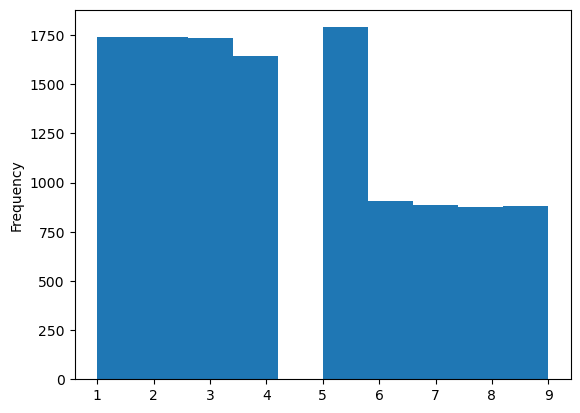

In [8]:
df2.bedroom.plot(kind="hist")

In [9]:
df2.bathroom.describe()

count    12195.000000
mean         3.134235
std          2.035950
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max          7.000000
Name: bathroom, dtype: float64

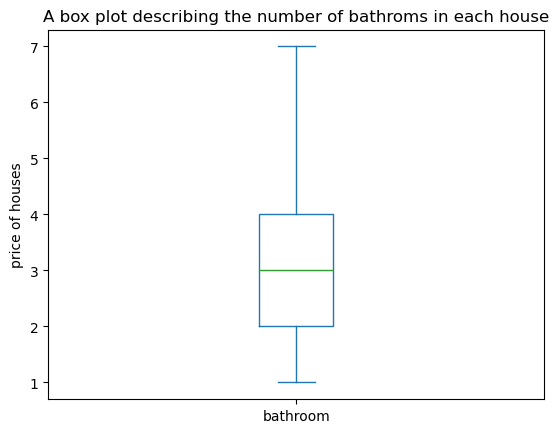

In [70]:
df2.bathroom.plot(kind="box")
plt.title("A box plot describing the number of bathroms in each house")
plt.ylabel("price of houses")
plt.show()

In [11]:
import seaborn as sns

In [12]:
import matplotlib.pyplot as plt

In [13]:
df2.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [14]:
df2.drop(columns=["ID"], inplace=True)

In [15]:
df2.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [16]:
df2['loc'].fillna(df2['loc'].mode()[0], inplace=True)
df2['title'].fillna(df2['title'].mode()[0], inplace=True)
df2['bedroom'].fillna(df2['bedroom'].mean(), inplace=True)
df2['bathroom'].fillna(df2['bathroom'].mean(), inplace=True)
df2['parking_space'].fillna(df2['parking_space'].mean(), inplace=True)

In [17]:
df2.isnull().sum()

loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [18]:
df2.head()

,loc,title,bedroom,bathroom,parking_space,price
0,Katsina,Semi-detached duplex,2.000000,2.0,1.000000,1149999.565
1,Ondo,Apartment,4.308171,2.0,4.000000,1672416.689
2,Ekiti,Flat,7.000000,5.0,3.169825,3364799.814
3,Anambra,Detached duplex,5.000000,2.0,4.000000,2410306.756
4,Kogi,Terrace duplex,4.308171,5.0,6.000000,2600700.898


In [19]:
df2.bedroom.corr(df2.price)

0.4969128320418354

In [20]:
df2.bathroom.corr(df2.price)

0.20480440077725548

In [21]:
len(df2)

14000

# split data into X and y

In [22]:
df2.columns

Index(['loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')

In [23]:
X = df2[['title', 'bedroom', 'bathroom', 'parking_space']]
y= df2["price"]

In [24]:
from sklearn.model_selection import train_test_split

# train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=42, shuffle=2)

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [74]:
df2["title"].value_counts()

title
Flat                    3094
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: count, dtype: int64

In [27]:
categorical_features = ["title"]

In [28]:
One_hot = OneHotEncoder()

In [29]:
transformer  = ColumnTransformer([("one_hot",
                                   One_hot, 
                                   categorical_features)], 
                                    remainder= "passthrough")                                 

In [30]:
X.head()

,title,bedroom,bathroom,parking_space
0,Semi-detached duplex,2.000000,2.0,1.000000
1,Apartment,4.308171,2.0,4.000000
2,Flat,7.000000,5.0,3.169825
3,Detached duplex,5.000000,2.0,4.000000
4,Terrace duplex,4.308171,5.0,6.000000


In [31]:
transformed_X= transformer.fit_transform(X)

In [32]:
print(transformed_X)

[[0.         0.         0.         ... 2.         2.         1.        ]
 [1.         0.         0.         ... 4.30817146 2.         4.        ]
 [0.         0.         0.         ... 7.         5.         3.16982525]
 ...
 [0.         1.         0.         ... 8.         6.         5.        ]
 [0.         0.         0.         ... 4.30817146 6.         1.        ]
 [0.         0.         0.         ... 9.         7.         5.        ]]


In [33]:
X.head()

,title,bedroom,bathroom,parking_space
0,Semi-detached duplex,2.000000,2.0,1.000000
1,Apartment,4.308171,2.0,4.000000
2,Flat,7.000000,5.0,3.169825
3,Detached duplex,5.000000,2.0,4.000000
4,Terrace duplex,4.308171,5.0,6.000000


In [34]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.000000,2.0,1.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.308171,2.0,4.000000
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.000000,5.0,3.169825
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,2.0,4.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.308171,5.0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.308171,7.0,3.169825
13996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.308171,7.0,5.000000
13997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.000000,6.0,5.000000
13998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.308171,6.0,1.000000


In [35]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, train_size=.80, random_state=42, shuffle=2)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
model = RandomForestRegressor()

In [38]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mse=mean_squared_error(y_pred, y_test)

In [45]:
mse

707305631703.9843

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lm = LinearRegression()

In [48]:
lm.fit(X_train, y_train)

LinearRegression()

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
y_pred = lm.predict(X_test)

In [51]:
mse=mean_squared_error(y_pred, y_test)

In [52]:
mse

608750344024.0872

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
dt = DecisionTreeRegressor()

In [55]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
y_pred = dt.predict(X_test)

In [57]:
mse=mean_squared_error(y_pred, y_test)

In [58]:
mse

773861824656.4159

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [61]:
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [62]:
y_pred = gb_model.predict(X_test)

In [63]:
mse=mean_squared_error(y_pred, y_test)

In [64]:
mse

600147679676.6029

In [65]:
from sklearn.linear_model import Ridge

In [66]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)


Ridge()

In [67]:
y_pred = ridge_model.predict(X_test)

In [68]:
mse=mean_squared_error(y_pred, y_test)

In [69]:
mse

608868086549.1195